# Young Adult Migration Pattern Dataset <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members

|    Name           |           Matric Number       |                      
|-------------------|-------------------------------|
|Muhammad Fikri Bin Sharunazim    | A21EC0075       |
|Muhammad Farhan Bin Ibrahim|        A21EC0072      |
|Muhammad Adam Fahmi Bin Mohd Taufiq |A21EC0061|
|Mikhail Bin Yassin |A21EC0053                      |

---
#About Dataset
*Young Adult Migration Pattern Dataset*

How far do people migrate between childhood and young adulthood? Where do they go? How much does one's location during childhood determine the labor markets that one is exposed to in young adulthood?

This project sheds light on these questions using newly constructed and publicly available statistics on the migration patterns of young adults in the United States. Use this resource to discover where people in your hometown moved as young adults.

Researchers at Harvard University and the Census Bureau have linked federal tax filings, Census records, and other government data to track the migration patterns of young US residents. Specifically, for each person born in the US between 1984 and 1992, the researchers compared where they lived at age 16 to where they lived at age 26. The project’s public dataset counts the approximate number who moved to/from each pair of commuting zones — overall and disaggregated by race/ethnicity and parental income level.

-------------------------------------------------------------------------

##Migration Patterns Data Dictionary

###Data Files:

• od_pooled.csv – Dataset contains count and fractions of people who move between each
origin and destination (OD) commuting zone pair. These data are unique at the OD level. The variable pool takes the value “pooled”.

• od_race.csv – Dataset contains count and fractions of people who move between each OD commuting zone pair separately by race/ethnicity. These data are unique at the OD x race level. The variable pool takes the values “Asian”, “Black”, “Hispanic”, “White”, and “Other”. Note that “Other” includes not only other races but also people who are not linked to the Decennial Census or ACS.

• od_inc.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by parental income quintile. These data are unique at the OD x income quintile level. The variable pool takes the values “Q1” (poorest parental income quintile), …, “Q5” (richest parental income quintile).

• od.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by race/ethnicity and parental income quintile. These data are unique at the OD x race/ethnicity x parental income level. The variable pool takes the values of the pairwise combinations of race (“Asian”, “Black”,
“Hispanic”, “White”, and “Other”) and parental income quintile (“Q1” - “Q5”). Note that the “Other” race/ethnicity category includes not only other races but also people who are not linked to the Decennial Census or ACS.



###Geographic variables:

• o_cz: The numeric identifier of the commuting zone (CZ) in which the individual resided in childhood/at age 16 (referred to as origin CZ hereafter).

• o_cz_name: The name of the origin CZ.

• o_state_name: The name of the state the origin CZ is in.

• d_cz: The numeric identifier of the CZ in which the individual resides in young adulthood/at age 26 (referred to as destination CZ hereafter).

• d_cz_name: The name of the destination CZ.

• d_state_name: The name of the state the destination CZ is in.


###Migration variables:

• n: The number of individuals from origin o living in destination d.

• n_tot_o: Total number of individuals from origin o. Generated by summing n across d_cz cells for each o_cz.

• n_tot_d: Total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz.

• pr_d_o: Pr{D|O}. The probability an individual lives in destination d given they grew up in origin o. Generated as n/n_tot_o.

• pr_o_d: Pr{O|D}. The probability an individual is from origin o given they live in destination d. Generated as n/n_tot_d.


- Step 1: Select a real-world dataset
- Step 2: Perform data preparation & cleaning
- Step 3: Perform exploratory analysis & visualization
- Step 4: Ask & answer questions about the data
- Step 5: Summarize your inferences & write a conclusion

# Dask on Young Adult Migration Patterns Dataset

In [2]:
def format_memory_usage(num, suffix='B'):
    for unit in ['', 'K', 'M', 'G', 'T', 'P', 'E', 'Z']:
        if abs(num) < 1024.0:
            return f"{num:.1f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f} Yi{suffix}"

In [3]:
def format_elapsed_time(elapsed_time):
    minutes, seconds = divmod(elapsed_time, 60)
    return f'{int(minutes):02d}:{int(seconds):02d}'

In [4]:
def format_cpu_usage(cpu_usage):
    return f'{cpu_usage:.2f}%'

In [5]:
results = {'Dask':[]}

## Downloading the Dataset

In [12]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikhaily","key":"e566853c8e415ee9a7094aa240eeb156"}'}

In [13]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sujaykapadnis/young-adult-migration-patterns
!unzip young-adult-migration-patterns.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 94% 255M/273M [00:01<00:00, 212MB/s]
100% 273M/273M [00:01<00:00, 192MB/s]
Archive:  young-adult-migration-patterns.zip
  inflating: Data Dictionary.pdf     
  inflating: od.csv                  
  inflating: od_inc.csv              
  inflating: od_pooled.csv           
  inflating: od_race.csv             


# Settings up the environment

Import necessaries tools and libraries

In [6]:
import dask
import dask.dataframe as dd

In [7]:
# Import time module
import time

# Import psutil
import psutil
import os

Read 'od.csv' dataset.

In [1]:
start_time_info = time.time()
file_path = 'od.csv'
df = dd.read_csv(file_path, dtype={'pr_d_o ': 'float16', 'pr_o_d ': 'float16'}, assume_missing=True)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

NameError: ignored

In [ ]:
start_time_info = time.time()
file_path = 'od.csv'
df = dd.read_csv(file_path)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [9]:
file_path = 'od.csv'

In [15]:
# Record start time
start_time = time.time()

# Reading the data
df = dd.read_csv(file_path)

# Calculate the CPU usage
cpu_usage = format_cpu_usage(psutil.cpu_percent(interval=1))



# Calculate the elapsed time
elapsed_time = format_elapsed_time(time.time() - start_time)

# Add the result to the dictionary
results['Dask'].append((cpu_usage, elapsed_time))

# print the difference between start
# and end time in seconds
print(results['Dask'])

[('100.00%', '00:01')]


Overview of the dataset

In [ ]:
%time df.compute()

CPU times: user 24.9 s, sys: 3.92 s, total: 28.9 s
Wall time: 20.4 s


,o_cz,o_cz_name,o_state_name,d_cz,d_cz_name,d_state_name,n,n_tot_o,n_tot_d,pool,pr_d_o,pr_o_d
0,100.0,Johnson City,Tennessee,10000.0,Panama City,Florida,0.0,36.0,44.0,AsianQ1,0.000000,0.000000
1,100.0,Johnson City,Tennessee,31303.0,Kerrville,Texas,0.0,36.0,2.0,AsianQ1,0.000000,0.000000
2,100.0,Johnson City,Tennessee,10600.0,Jasper,Alabama,0.0,36.0,6.0,AsianQ1,0.000000,0.000000
3,100.0,Johnson City,Tennessee,2600.0,Roanoke Rapids,North Carolina,0.0,36.0,8.0,AsianQ1,0.000000,0.000000
4,100.0,Johnson City,Tennessee,11402.0,Marinette,Michigan,0.0,36.0,5.0,AsianQ1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
792068,39400.0,Seattle,Washington,22800.0,Eau Claire,Wisconsin,1.0,96029.0,4638.0,WhiteQ5,0.000010,0.000216
792069,39400.0,Seattle,Washington,16500.0,Erie,Pennsylvania,7.0,96029.0,5811.0,WhiteQ5,0.000073,0.001205
792070,39400.0,Seattle,Washington,33601.0,Lawton,Oklahoma,11.0,96029.0,1806.0,WhiteQ5,0.000115,0.006091
792071,39400.0,Seattle,Washington,38601.0,Spokane,Washington,924.0,96029.0,11179.0,WhiteQ5,0.009622,0.082655


## Big Data Operations

In this section, we will:

- Check for any Nan value in every columns and remove the row from the dataframe.
- Optimize the data types.

In [ ]:
%time df.isna().sum().compute()

CPU times: user 35.9 s, sys: 2.19 s, total: 38.1 s
Wall time: 29.6 s


o_cz                 0
o_cz_name            0
o_state_name         0
d_cz                 0
d_cz_name            0
d_state_name         0
n                    0
n_tot_o              0
n_tot_d              0
pool                 0
pr_d_o          587613
pr_o_d          601692
dtype: int64

In [ ]:
# drop 'pr_d_o' and 'pr_o_d' columns
start_time_info = time.time()
df.drop('pr_d_o', axis=1)
df.drop('pr_o_d', axis=1)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()
print(df.dtypes)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

o_cz            float64
o_cz_name        object
o_state_name     object
d_cz            float64
d_cz_name        object
d_state_name     object
n               float64
n_tot_o         float64
n_tot_d         float64
pool             object
pr_d_o          float64
pr_o_d          float64
dtype: object

Time taken to run the info operation: 0.01 seconds


In [ ]:
# change 'o_cz_name' from object to categorical
start_time_info = time.time()
df['o_cz_name'] = df['o_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()
# change 'o_state_name' from object to categorical
df['o_state_name'] = df['o_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()
# change 'd_cz_name' from object to categorical
df['d_cz_name'] = df['d_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()
# change 'd_state_name' from object to categorical
df['d_state_name'] = df['d_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()
# change 'pool' from object to categorical
df['pool'] = df['pool'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()
# check 'o_cz' highest value
highest_value = df['o_cz'].max().compute()

# check 'o_cz' lowest value
lowest_value = df['o_cz'].min().compute()

print()
print(f"The highest value in the o_cz is: {highest_value}")
print(f"The lowest value in the o_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the o_cz is: 39400.0
The lowest value in the o_cz is: 100.0

Time taken to run the info operation: 45.29 seconds


In [ ]:
# change the datatype 'o_cz' from int64 to int32

start_time_info = time.time()
df['o_cz'] = df['o_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()

# check 'd_cz' highest value
highest_value = df['d_cz'].max().compute()

# check 'd_cz' lowest value
lowest_value = df['d_cz'].min().compute()

print()
print(f"The highest value in the d_cz is: {highest_value}")
print(f"The lowest value in the d_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the d_cz is: 39400.0
The lowest value in the d_cz is: 100.0

Time taken to run the info operation: 46.37 seconds


In [ ]:
# change the datatype 'd_cz' from int64 to int32

start_time_info = time.time()
df['d_cz'] = df['d_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()

# check 'n' highest value
highest_value = df['n'].max().compute()

# check 'n' lowest value
lowest_value = df['n'].min().compute()

print()
print(f"The highest value in the n is: {highest_value}")
print(f"The lowest value in the n is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n is: 189469.0
The lowest value in the n is: -2.0

Time taken to run the info operation: 44.20 seconds


In [ ]:
# change the datatype 'n' from int64 to int32

start_time_info = time.time()
df['n'] = df['n'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_o' highest value
highest_value = df['n_tot_o'].max().compute()

# check 'n_tot_o' lowest value
lowest_value = df['n_tot_o'].min().compute()

print()
print(f"The highest value in the n_tot_o is: {highest_value}")
print(f"The lowest value in the n_tot_o is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n_tot_o is: 220922.0
The lowest value in the n_tot_o is: -4.0

Time taken to run the info operation: 45.19 seconds


In [ ]:
# change the datatype 'n_tot_o' from int64 to int32

start_time_info = time.time()
df['n_tot_o'] = df['n_tot_o'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_d' highest value
highest_value = df['n_tot_d'].max().compute()

# check 'n_tot_d' lowest value
lowest_value = df['n_tot_d'].min().compute()

print()
print(f"The highest value in the n_tot_d is: {highest_value}")
print(f"The lowest value in the n_tot_d is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n_tot_d is: 289532.0
The lowest value in the n_tot_d is: -3.0

Time taken to run the info operation: 44.06 seconds


In [ ]:
# change the datatype 'n_tot_d' from int64 to int32

start_time_info = time.time()
df['n_tot_d'] = df['n_tot_d'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()
print(df.dtypes)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

o_cz               int32
o_cz_name       category
o_state_name    category
d_cz               int32
d_cz_name       category
d_state_name    category
n                  int32
n_tot_o            int32
n_tot_d            int32
pool            category
pr_d_o           float64
pr_o_d           float64
dtype: object

Time taken to run the info operation: 0.00 seconds


## Exploratory Data Analysis (EDA)

In this section, we will:

- Provide some useful visualizations to make better understanding on the analysis.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
print(df['n'].sum().compute())

31434476


In [ ]:
print(df['n'].describe().compute())

count    1.372702e+07
mean     2.289970e+00
std      2.085092e+02
min     -2.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.894690e+05
Name: n, dtype: float64


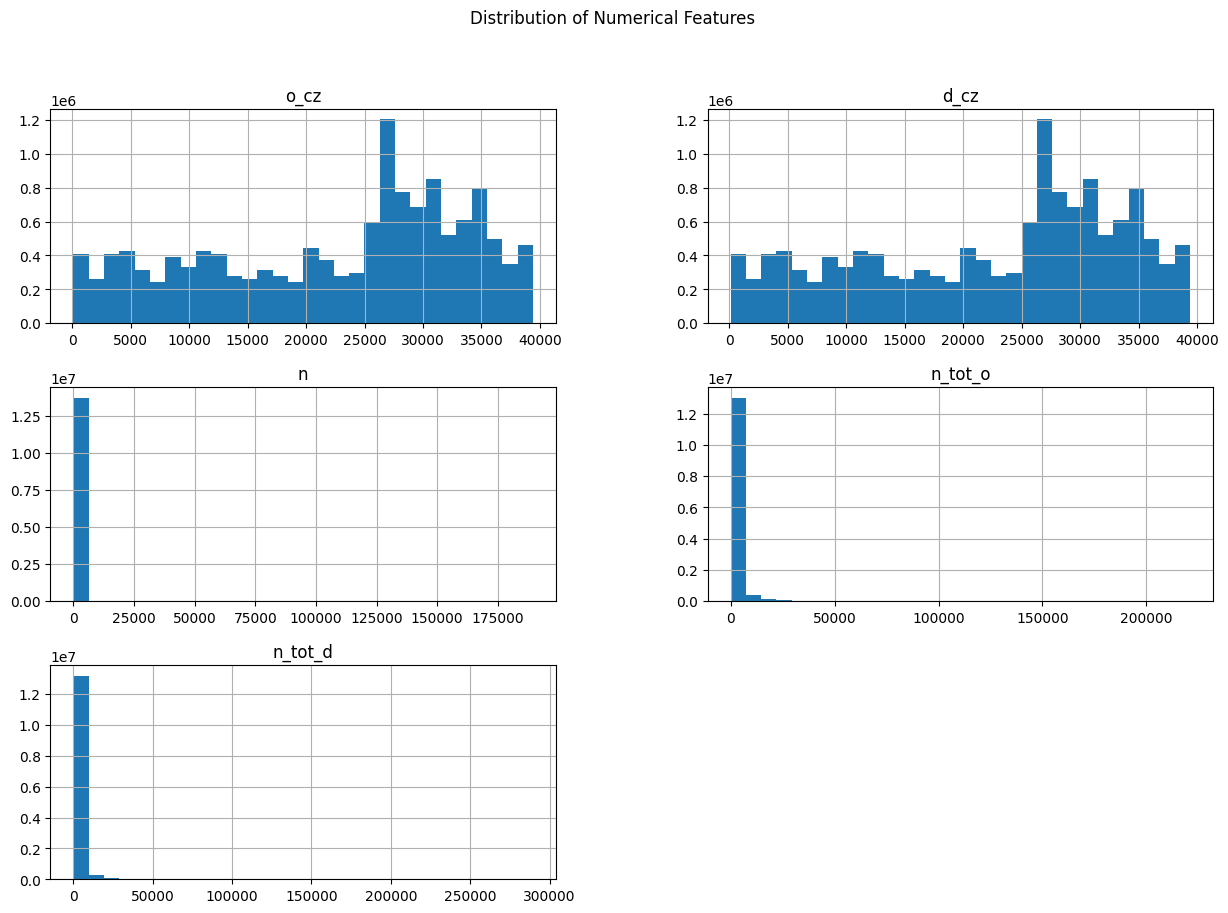


Time taken to run the code: 27.73 seconds


In [ ]:
start_time = time.time()
num_cols = ['o_cz', 'd_cz', 'n', 'n_tot_o', 'n_tot_d']
df_cols = df[num_cols].compute()
df_cols.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: 1696.87
CPU times: user 16.4 s, sys: 2.49 s, total: 18.9 s
Wall time: 12.7 s


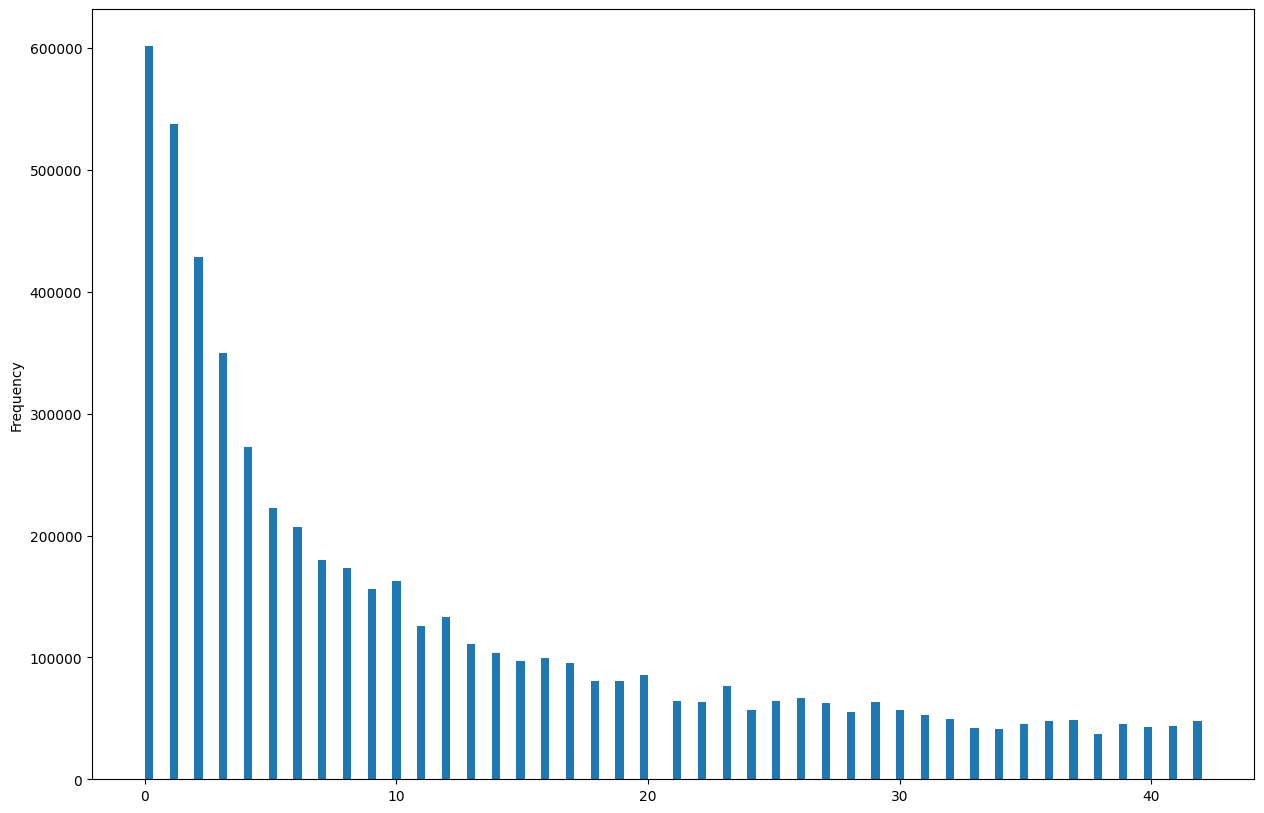

In [21]:
# Calculate the mean of the total number of individuals who live in destination d
mean_total_destination_d = df['n_tot_d'].mean().compute()
print(f'Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: {mean_total_destination_d:.2f}')

# Plot a histogram of the total number of individuals who live in destination d
%time df['n_tot_d'].compute().plot(kind='hist', bins=128, figsize=(15, 10), range=[0, 42])
plt.show()

##Modin

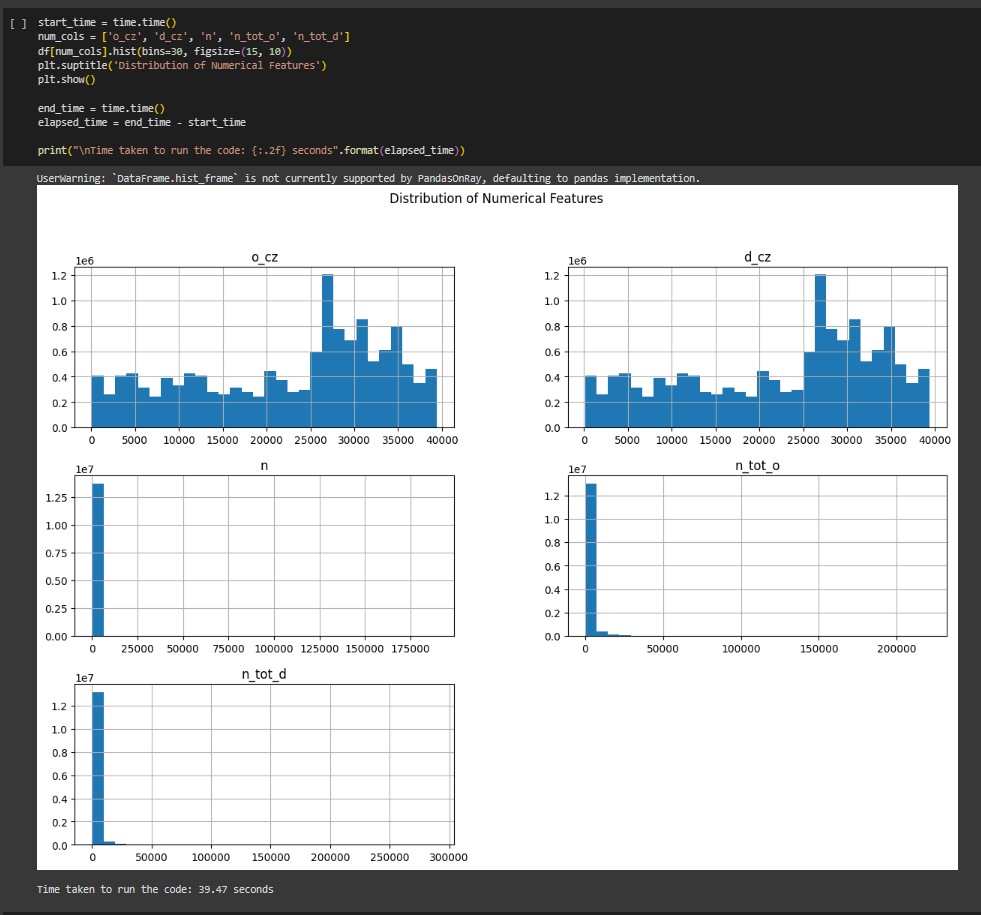

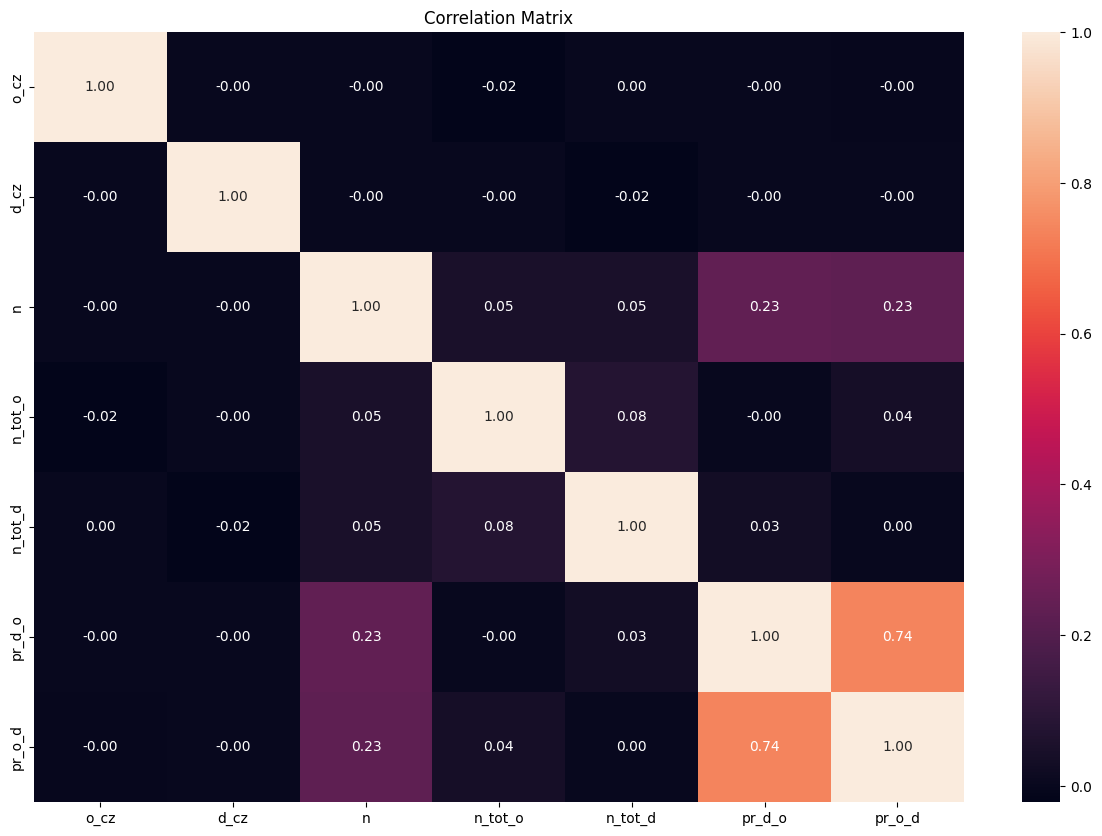

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include='number')

# Get the correlation matrix
corr = numeric_cols.corr().compute()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

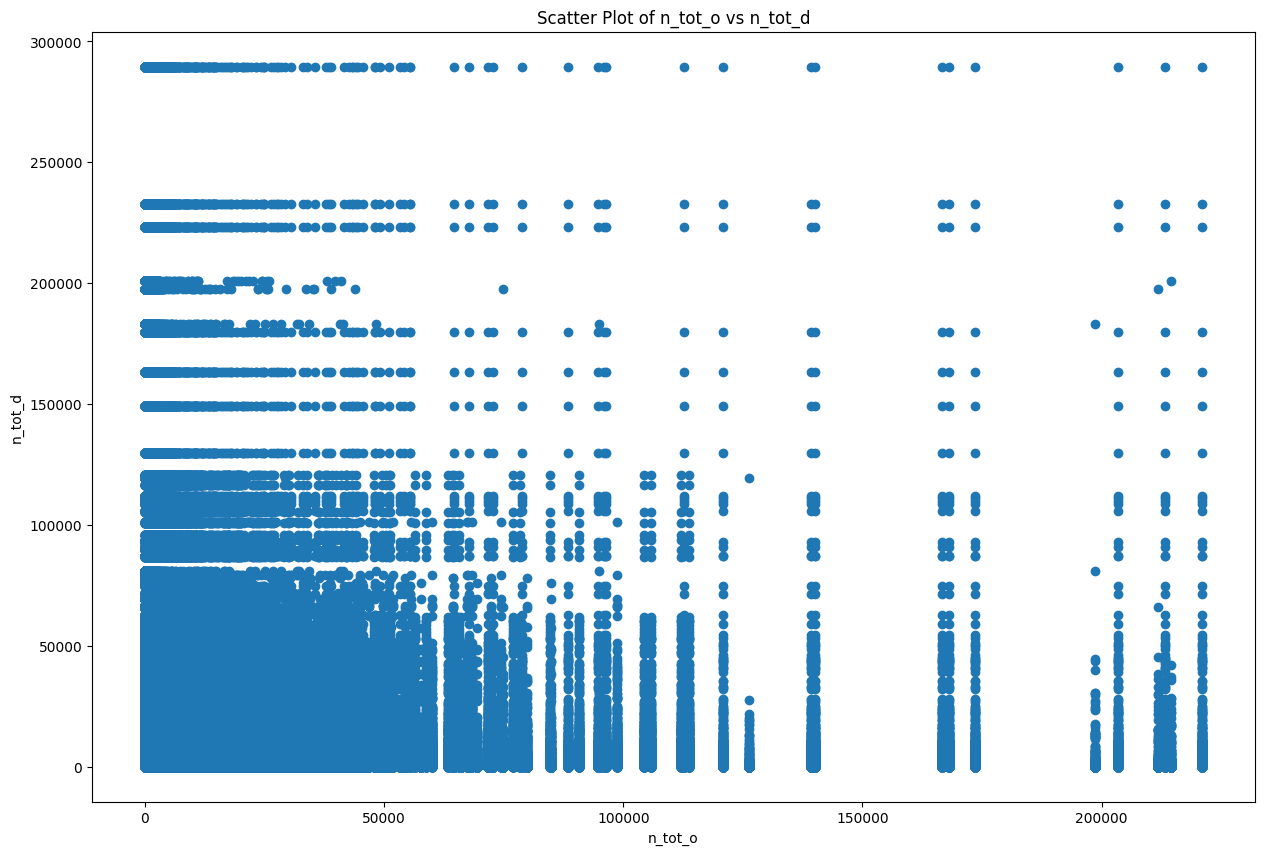

In [ ]:
# Scatter Plot of n_tot_o vs n_tot_d

plt.figure(figsize=(15, 10))
plt.scatter(df['n_tot_o'], df['n_tot_d'])
plt.title('Scatter Plot of n_tot_o vs n_tot_d')
plt.xlabel('n_tot_o')
plt.ylabel('n_tot_d')
%time plt.show()

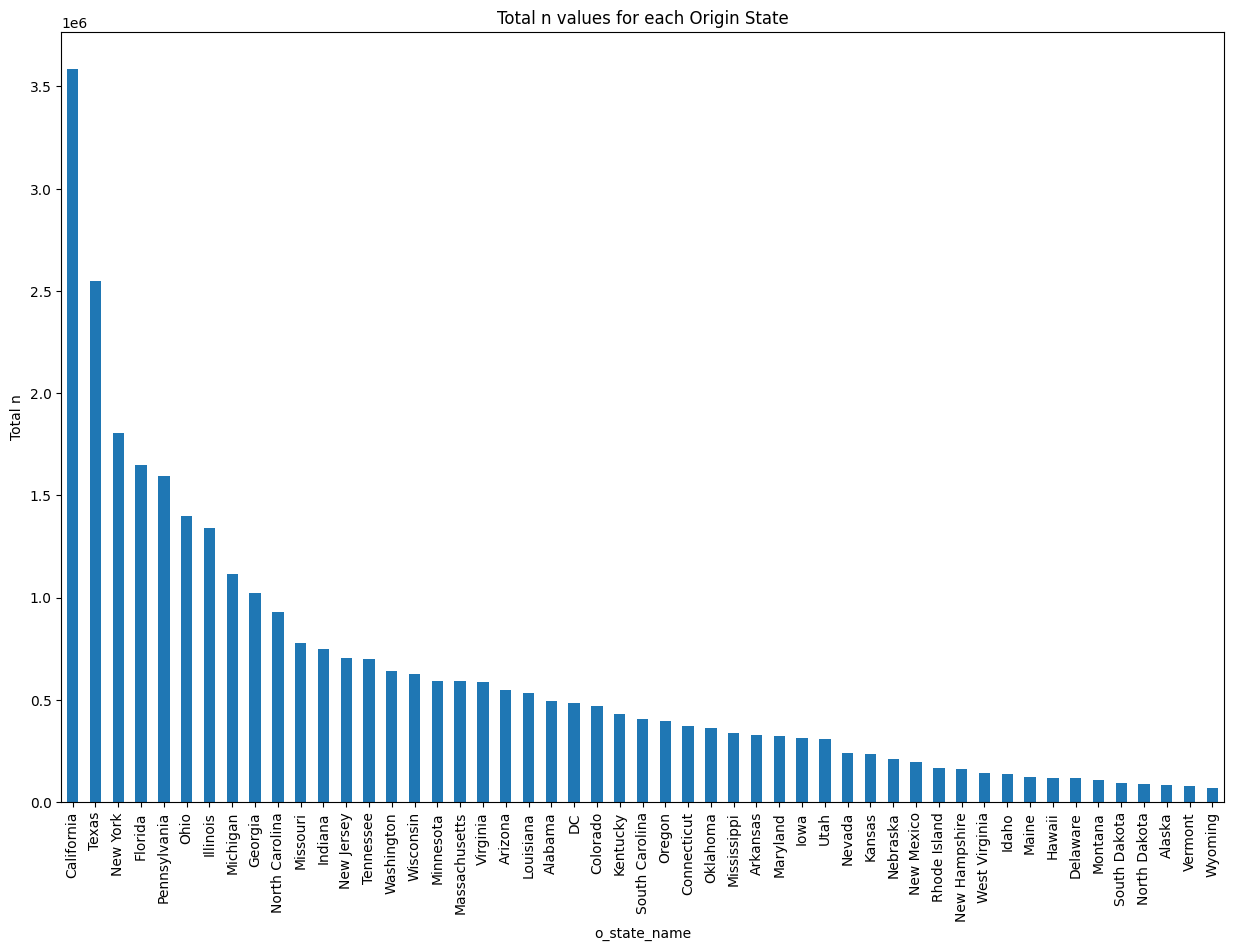

In [ ]:
# Bar Plot of n values for each o_state_name

grouped = df.groupby('o_state_name')['n'].sum()

result = grouped.compute()

result.sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title('Total n values for each Origin State')
plt.ylabel('Total n')
plt.show()

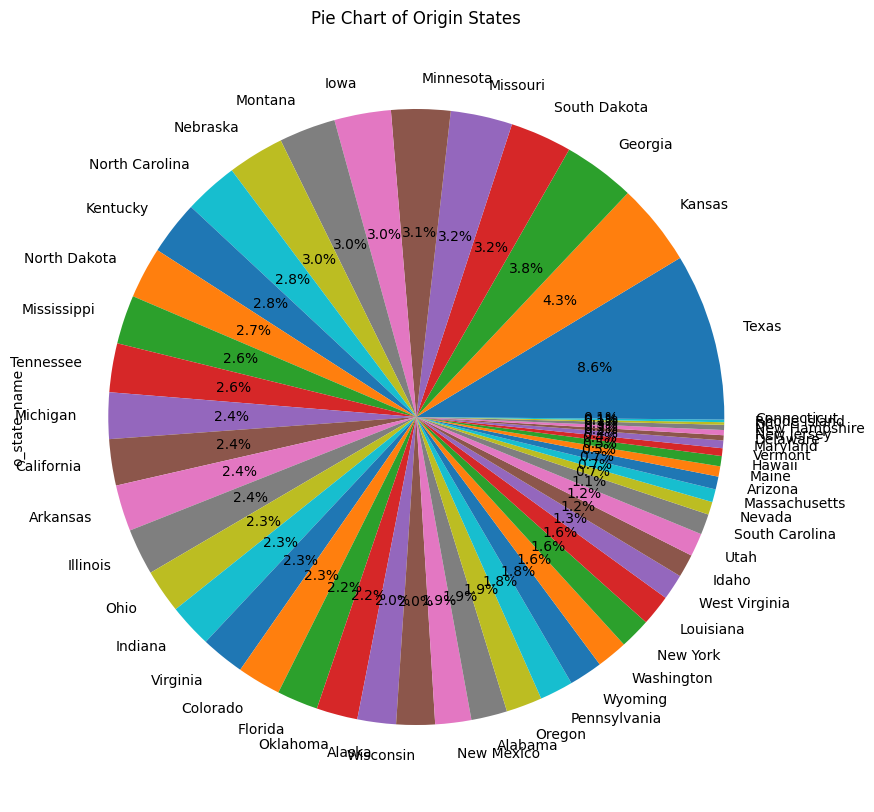

In [ ]:
# Pie Chart of o_state_name

value_counts = df['o_state_name'].value_counts()
result = value_counts.compute()
result.plot(kind='pie', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Pie Chart of Origin States')
plt.show()

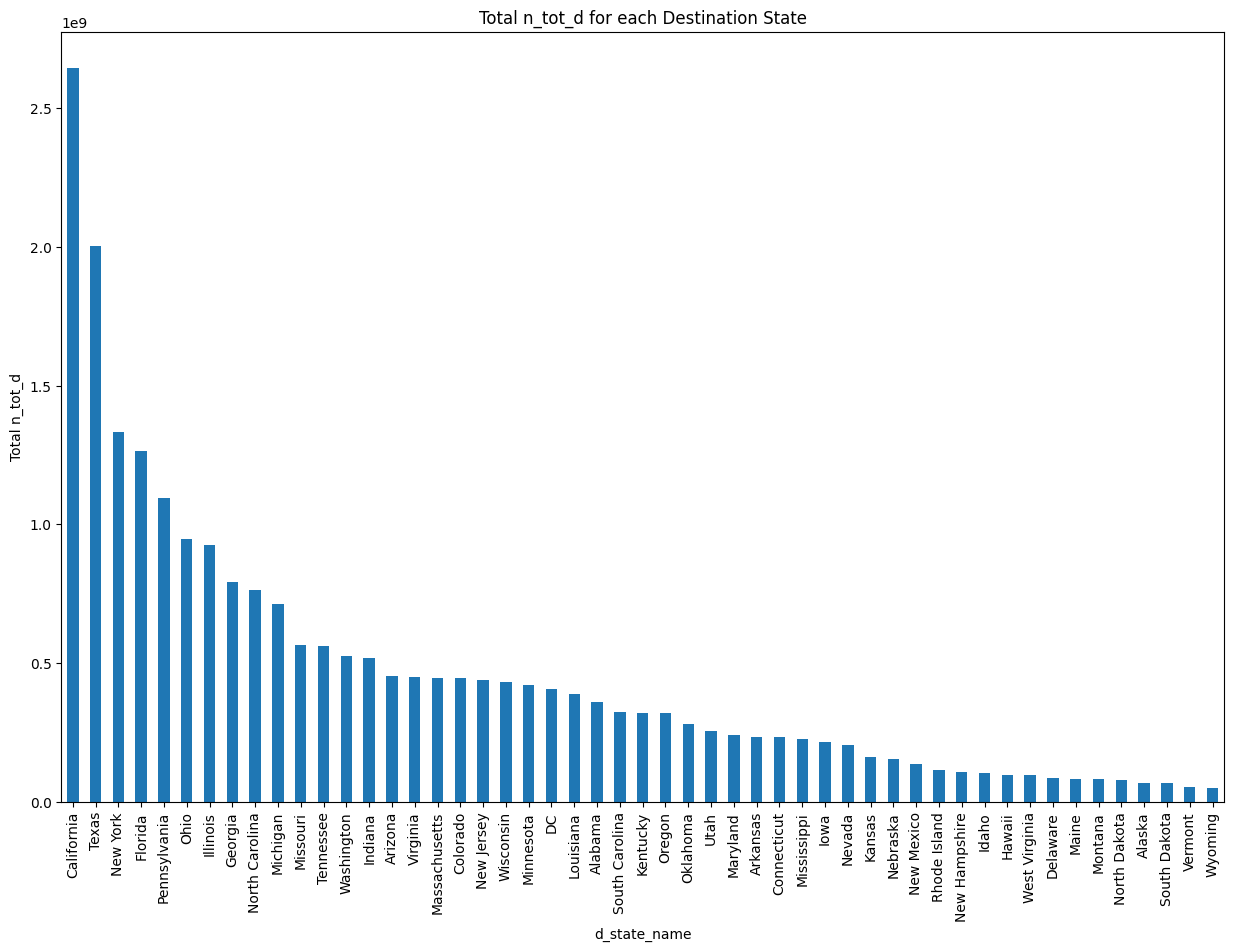

In [ ]:
# Bar Plot of n_tot_d for each d_state_name

grouped = df.groupby('d_state_name')['n_tot_d'].sum()
result = grouped.compute()
result.sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title('Total n_tot_d for each Destination State')
plt.ylabel('Total n_tot_d')
plt.show()